# Forelesning 4: Numerisk derivasjon

## Definisjon

Analytisk derivasjon:
$$f'(x) = \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x)-f(x)}{\Delta x}$$

Numerisk derivasjon:
$$f'(x) \approx \frac{f(x+\Delta x)-f(x)}{\Delta x}$$

der $\Delta x$ er et lite tall.

## Derivasjon av funksjoner

In [1]:
def f(x):
    return x**2 + 1

x = 1
dx = 1E-8

dy = f(x + dx) - f(x)
dydx = dy/dx

print(dydx)

1.999999987845058


In [2]:
def f(x):
    return x**2 + 1


def fder(f, x, dx = 1E-8):
    der = (f(x + dx) - f(x))/dx
    return der

print(fder(f,1))

1.999999987845058


Velger en dx som er så liten som mulig ($dx \rightarrow 0$), men ikke for liten. Da forstørres feilen, og vi får en dårligere tilnærming.

In [11]:
def f(x):
    return x**3 - 4*x + 3


def framoverdifferanse(f, a, dx = 1E-8):
    """
    Deriverer en funksjon f i punktet a.
    ----------
    f : function
        Funksjonen vi skal derivere.
    a : float
        Punktet vi skal evaluere den deriverte i.
    dx : float, optional
        Endringen i x-verdier. The default is 1E-8.

    Returns
    -------
    der : float.
          Den deriverte av f(a)
    """
    der = (f(x + dx) - f(x))/dx
    return der

print(framoverdifferanse(f,1))

-0.999999993922529


Vise import fra egne moduler.

## Andre tilnærminger

In [12]:
def bakoverdifferanse(f, a, dx = 1E-8):
    der = (f(a) - f(a - dx))/dx
    return der

print(bakoverdifferanse(f,1))

def sentraldifferanse(f, a, dx = 1E-8):
    der = (f(a + dx) - f(a - dx))/(2*dx)
    return der

print(sentraldifferanse(f,1))

-1.00000003833145
-1.0000000161269895


## Feilanalyse

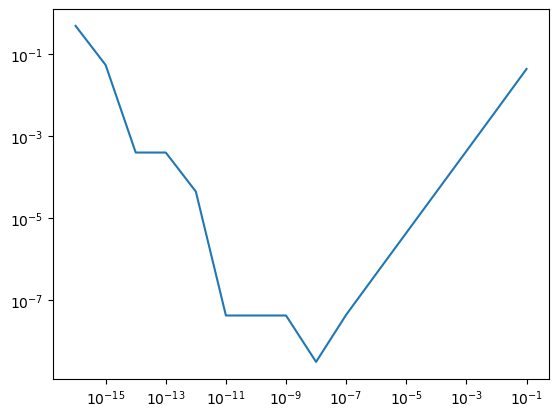

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

x = np.pi/3
eksakt = 0.5

delta_x = []
feil = []

for i in range(1,17):
    dx = 10**-i
    dfdx = (f(x + dx) - f(x))/dx
    feil.append(abs(eksakt - dfdx))
    delta_x.append(dx)

plt.plot(delta_x, feil)
plt.yscale("log")
plt.xscale("log")
plt.show()

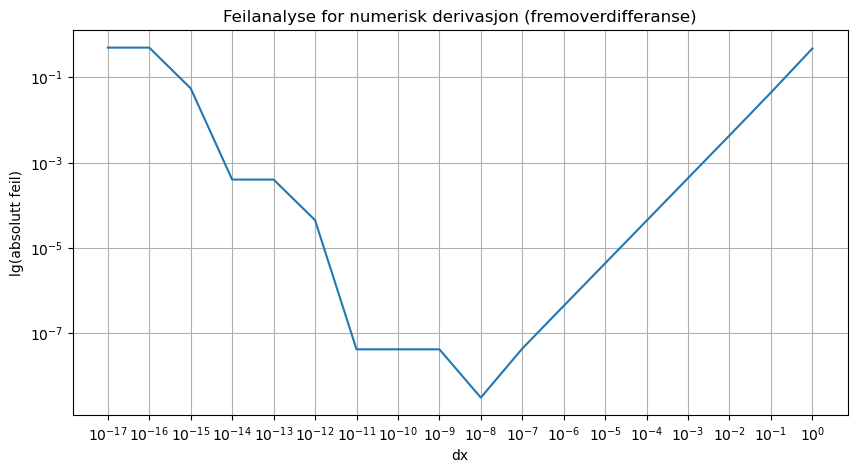

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

x = np.pi/3
eksakt = 0.5

N = 17
dx = np.zeros(N+1)
feil = np.zeros(N+1)

for i in range(N+1):
    dx[i] = 10**-i
    dfdx = (f(x + dx[i]) - f(x))/dx[i]
    feil[i] = abs(eksakt - dfdx)

    
plt.figure(figsize = (10,5))
plt.plot(dx, feil)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("dx")
plt.ylabel("lg(absolutt feil)")
plt.title("Feilanalyse for numerisk derivasjon (fremoverdifferanse)")
plt.grid()
plt.xticks(dx)
plt.show()

## Derivasjon av data

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv("https://raw.githubusercontent.com/andreasdh/programmering-i-kjemi/master/docs/datafiler/heistur_kjemi_fysikk.txt")

In [58]:
tid = data["time_s"]
s = data["height_m"]
v = []

nytid = []
for i in range(len(tid)-1):
    dy = s[i+1] - s[i]
    dt = tid[i+1] - tid[i]
    dydt = dy/dt
    v.append(dydt)

v.append(None)

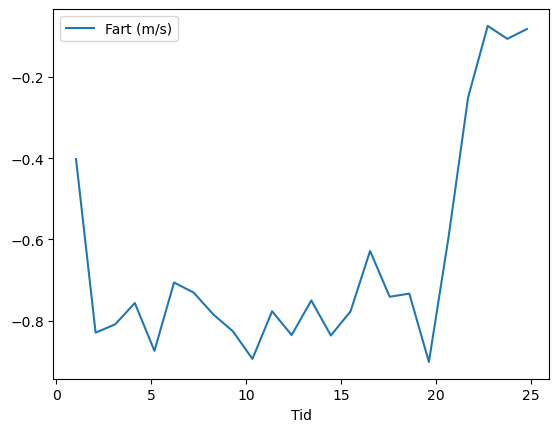

In [59]:
plt.plot(tid, v, label="Fart (m/s)")
plt.xlabel("Tid")
#plt.ylim(-5,0)
plt.legend()
plt.show()

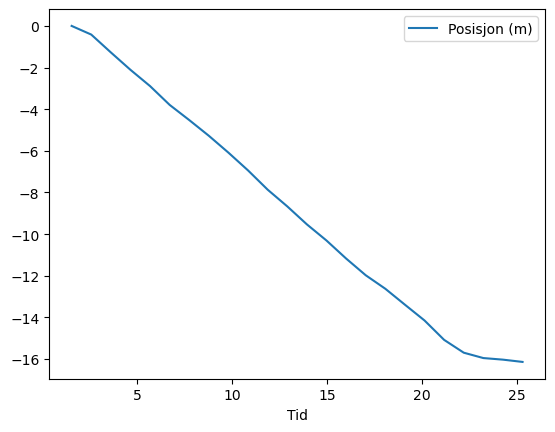

In [57]:
plt.plot(nytid, s, label="Posisjon (m)")
#plt.plot(tid, v, label="Fart (m/s)")
plt.xlabel("Tid")
#plt.ylim(-5,0)
plt.legend()
plt.show()